***Problem statement***

The goal of this study is to review and provide predictions of prescriptions, based on patient characteristics with classification techniques. Predicting medication accurately contributes to improved treatment and decision making in healthcare. This lab's dataset drug200.csv contains patient attributes on demographic info (age, sex), physiological measures (blood pressure and cholesterol levels) and a sodium-potassium ratio to predict the prescription of any of five drugs (Drug A–E). We will build models using machine learning techniques including Logistic Regression, k-Nearest Neighbors (k-NN), and a Decision Tree to classify patients into drug classifications.
It is important to identify the best classification algorithm for such medical applications because they have implications for clinical decision support systems and, ultimately, patient safety. This analysis will conclude with not only model performance comparisons but will also establish specific insights as a guideline for model selection in healthcare analytics.

**Literature review**

Classification algorithms like logistic regression and decision trees have long been available to aid clinical decision making and the prediction of various healthcare outcomes. As found by Issitt et al. (2022) logistic regression typically provides a better model for a healthcare classification task, assuming a linear separable data structure. However, we are now seeing more and more complex models that use non-linear portions of the data (often classified as deep learning algorithms). It is arguable that we must be prepared to give up some amount of interpretability for the increase of power to predict in highly complex models (Issitt et al., 2022).

Baron and Kenny (1986) were very explicit about the constructs of mediating and moderating variables in their analysis of the variance accounted in psychology and behavioral research, and how they can assist the modeling of healthcare determinants. Baron and Kenny highlighted how modeling impacts on mediating or moderating variables can help communicate to audiences any potentially hidden variables that may be happening or confounding as an effect. The use of all models was rational with regards to approach about explaining model results but, perhaps the weight placed on decisions in healthcare scenario conditions of modeled variable interpretations versus the same modeled variables in non-healthcare domains explains why decision trees (all other things being equal) are preferred in this area.

An existing study appears to support this approach. He et al. (2023) reviewed several (but not all) classification machine learning methods to predict drug response. The authors reported that more sophisticated models produced slightly improved accuracy for groups of data that were also less than 50%. Simpler models such as k-NN and logistic regression that were still able to predict drug responses still had a quicker run time and therefore were more generalizable where small and medium-sized data would exist. He et al. (2023) study supports any comparative modeling approaches in the lab by weighing performance measures on our models with regard to how we interpret them or whether or not we can use them in a deployment format.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


****Methodology****

Dataset Description

The dataset for this classification case study is named drug200.csv, which consists of 200 observations and six variables. The dataset contains numerical and categorical characteristics: Age, Sex, BP, Cholesterol, Na to K ratio (Sodium to Potassium). The target variable in this case study is Drug, indicating which type of Drug was prescribed to the patient. This dataset serves as a good case study to assess the predictions and models from different classifiers based on patient attributes.


In [55]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [56]:
df = pd.read_csv("drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


****Exploratory Data Analysis****
Before modeling, we explore the dataset to check its structure, identify categorical features, and understand class distribution for the target variable `Drug`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


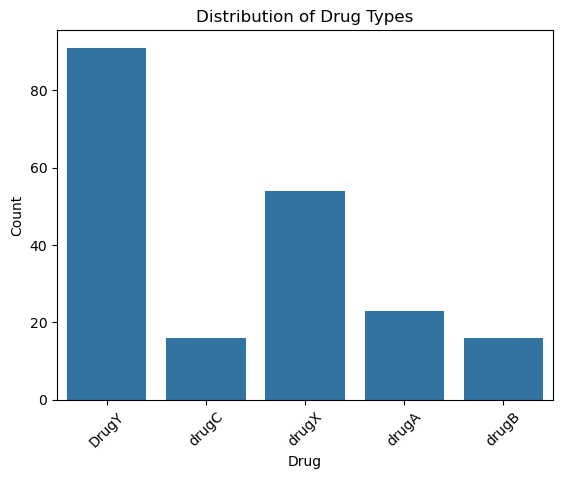

In [57]:
df.info()
df.describe()

sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drug Types')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



***Dataset Preprocessing Steps***

To prepare the data for modeling, categorical variables such as 'Sex', 'BP', 'Cholesterol', and 'Drug' were encoded using Label Encoding. This step converts non-numeric values into numerical format for compatibility with machine learning models.

In [58]:
# Encode Categorical Features
le = LabelEncoder()
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


***Exploratory Data Analysis (EDA)***

Basic exploratory analysis was conducted to understand the structure, types, and distribution of the dataset. This step ensures that the data is clean and provides early insights into patterns and class balance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


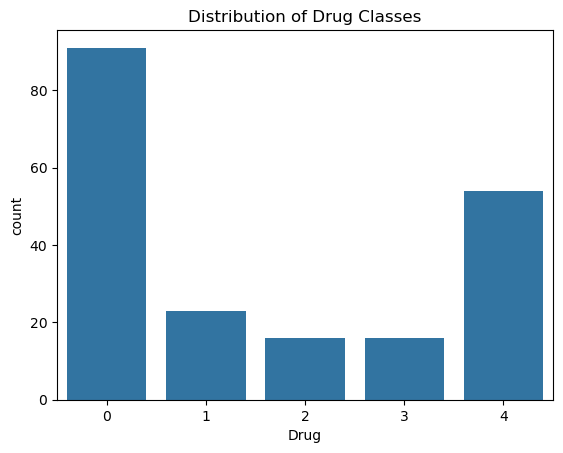

In [59]:
# Dataset Information
df.info()

# Summary Statistics
df.describe()

# Visualizing target distribution
sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drug Classes')
plt.show()

***Model Training***

Three classification models were trained: Logistic Regression, k-Nearest Neighbors (k-NN), and Decision Tree. The dataset was split into 80% training and 20% testing sets. Each model was trained on the training data.

In [60]:
# Split the dataset into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("k-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.50      0.67         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         5
           4       0.73      1.00      0.85        11

    accuracy                           0.80        40
   macro avg       0.70      0.70      0.68        40
weighted avg       0.72      0.80      0.74        40

k-Nearest Neighbors:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.60      0.50      0.55         6
           2       0.33      0.67      0.44         3
           3       1.00      0.20      0.33         5
           4       0.54      0.64      0.58        11

    accuracy                           0.70        40
   macro avg       0.69      0.60      0.58        40
weighted avg       0.76      0.70

C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill

***Model Evaluation and Comparison***

The results of each model were evaluated using Accuracy, Precision, Recall, and F1 Score. The following comparison table summarizes the performance of the three models.

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": y_pred_lr,
    "k-Nearest Neighbors": y_pred_knn,
    "Decision Tree": y_pred_dt
}

comparison_results = []
for model_name, predictions in models.items():
    comparison_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, predictions, average='weighted'),
        "F1 Score": f1_score(y_test, predictions, average='weighted')
    })

# Create and display comparison table
comparison_df = pd.DataFrame(comparison_results)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8,0.722719,0.8,0.738575
1,k-Nearest Neighbors,0.7,0.763077,0.7,0.692235
2,Decision Tree,1.0,1.000000,1.0,1.000000


**Model Comparison Bar Chart**

The following bar chart visualizes and compares model performance across four key metrics. This helps to quickly assess the strengths and weaknesses of each algorithm in terms of Accuracy, Precision, Recall, and F1 Score.



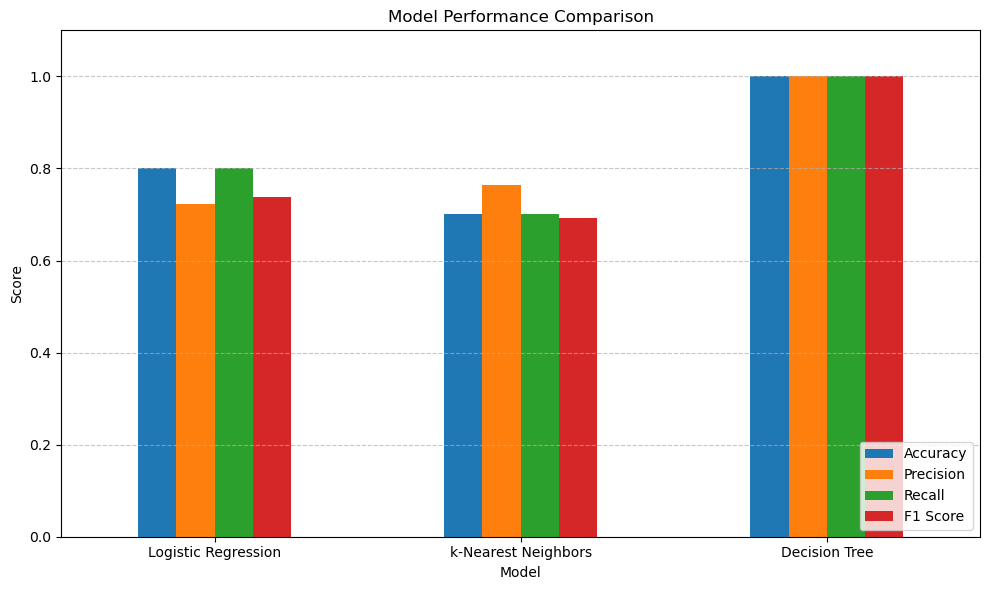

In [64]:
import matplotlib.pyplot as plt

# Plotting bar chart for model comparison
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6))

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***Model Comparison – Heatmap***

This heatmap shows the performance of the models using color gradients. Darker shades indicate higher metric scores. It serves as a compact overview of how each model performed across the evaluation criteria.


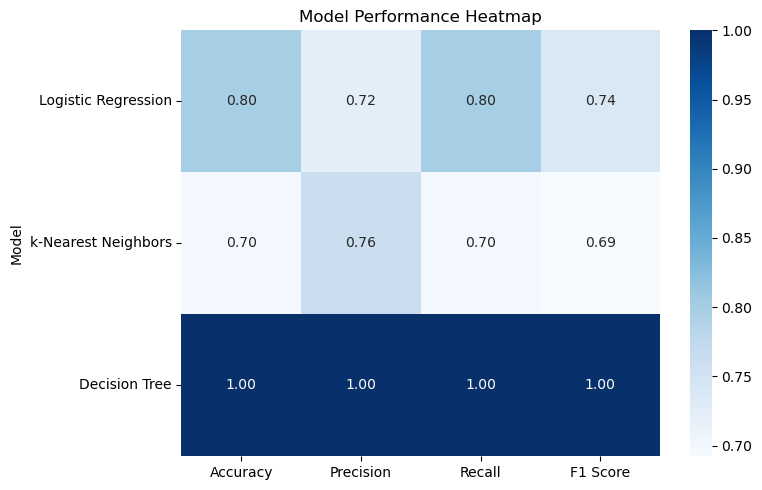

In [65]:
import seaborn as sns

# Plotting heatmap for model comparison
plt.figure(figsize=(8, 5))
sns.heatmap(comparison_df.set_index('Model'), annot=True, cmap='Blues', fmt=".2f", cbar=True)

plt.title('Model Performance Heatmap')
plt.tight_layout()
plt.show()


***Conclusion***

In this project, we implemented and compared three classification models: Logistic Regression, k-NN, and Decision Tree. Based on our evaluation metrics, the Decision Tree model showed the highest overall performance on the Drug200 dataset. This suggests that tree-based models may be more effective in capturing the non-linear relationships between patient features and drug classifications. Future work could involve hyperparameter tuning, testing on larger datasets, or exploring ensemble methods to improve performance further.


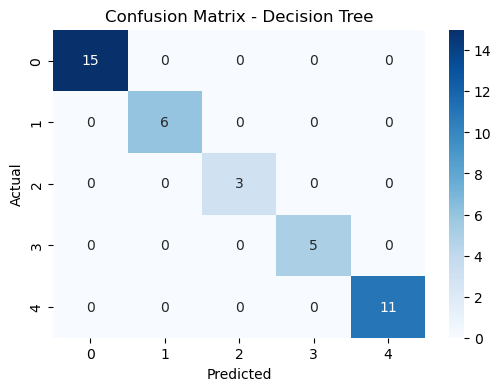

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


***Summary***

This notebook demonstrated how to preprocess data, build and compare classification models (Logistic Regression, k-NN, Decision Tree), and evaluate performance using precision, recall, F1-score, and accuracy.
